<a href="https://colab.research.google.com/github/DikshantPatel2210/TimeSeries_Forecasting_Gold-Price/blob/main/Gold_Monthly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import month_plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt


import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/gold_monthly_csv.csv")
df.sample(5)

,Date,Price
156,1963-01,35.060
844,2020-05,1715.697
118,1959-11,35.060
798,2016-07,1337.429
622,2001-11,276.248


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [6]:
df.shape

(847, 2)

In [7]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


In [8]:
print(f"Date range of gold prices available from {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from 1950-01 to 2020-07


In [9]:
data = pd.date_range(start = '1/1/1950', end = '8/1/2020', freq = 'M')
data

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [10]:
df['month'] = data
df.drop('Date',axis = 1, inplace = True)
df = df.set_index('month')
df.sample(5)

,Price
month,
2010-11-30,1371.784
1995-05-31,385.231
1956-11-30,34.980
1985-04-30,324.883
2003-02-28,359.575


In [11]:
df.sample(5)

,Price
month,
1958-11-30,35.100
1953-07-31,34.910
1998-04-30,308.558
2008-12-31,819.940
2019-04-30,1287.650


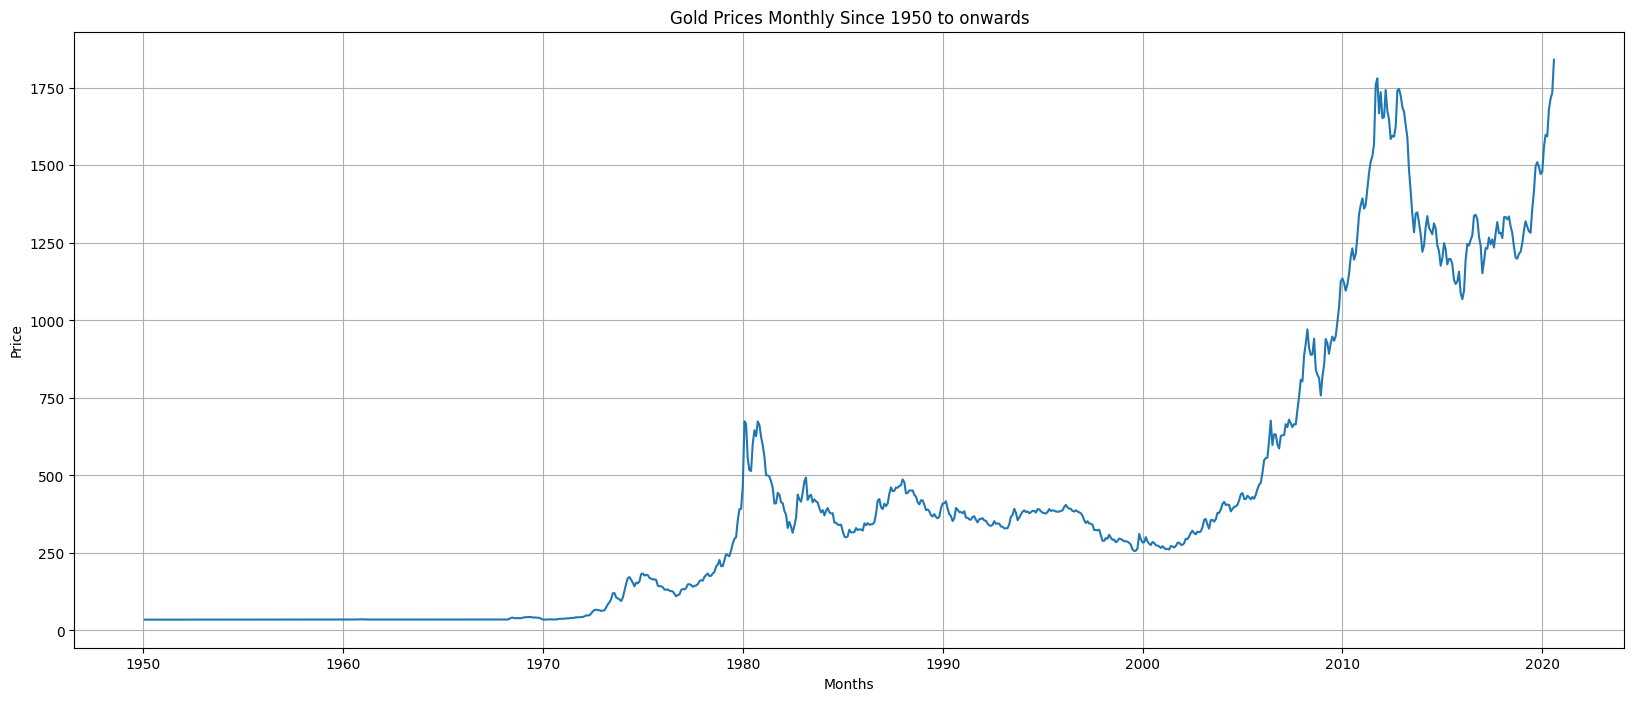

In [12]:
plt.figure(figsize = (20,8))
plt.plot(df.index, df["Price"])
plt.xlabel('Months')
plt.ylabel('Price')
plt.title('Gold Prices Monthly Since 1950 to onwards')
plt.grid()

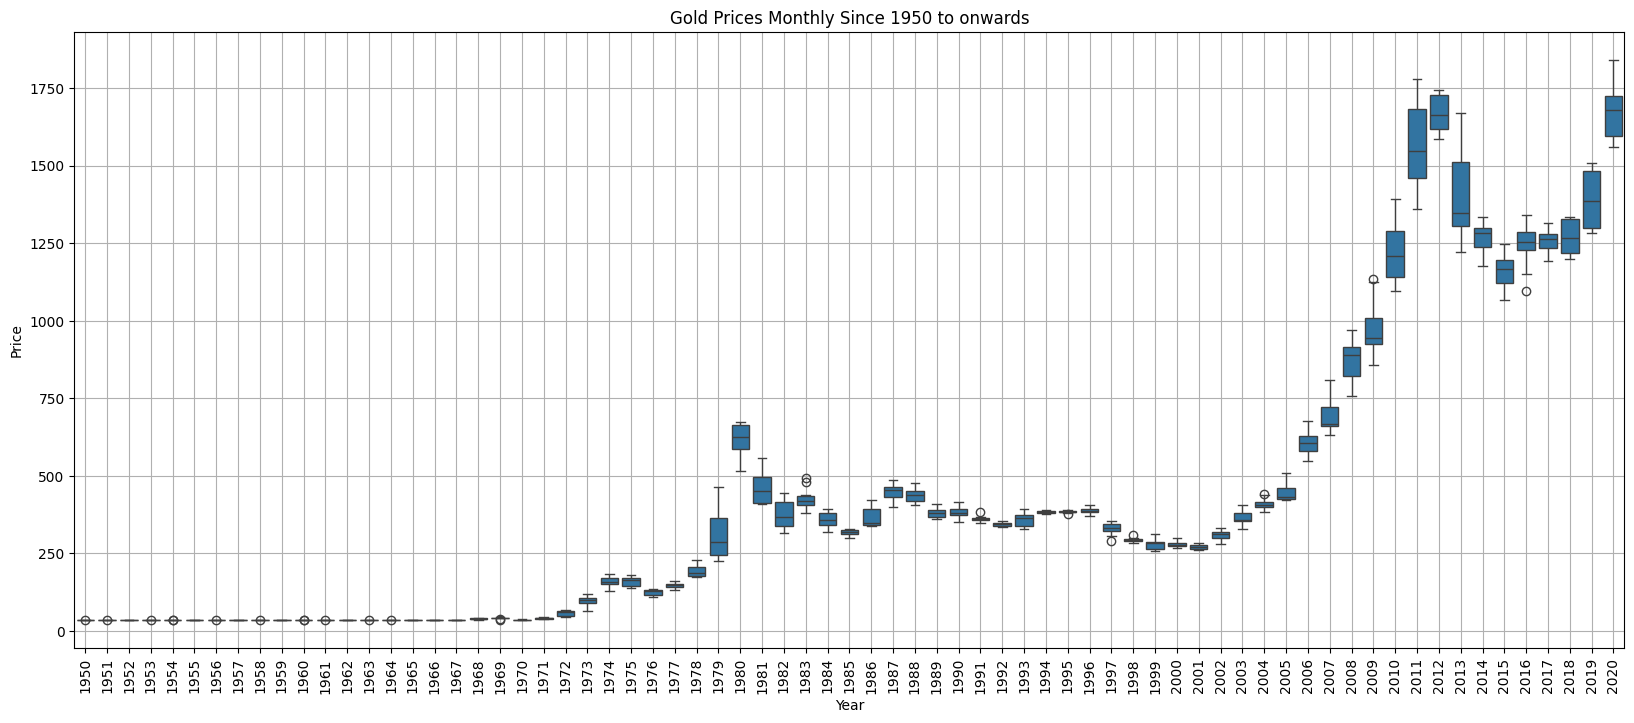

In [13]:
_, ax = plt.subplots(figsize = (20,8))
sns.boxplot(x = df.index.year, y = df['Price'],ax= ax,)
sns.color_palette("flare", as_cmap=True)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Gold Prices Monthly Since 1950 to onwards')
plt.xticks(rotation = 90)
plt.grid()

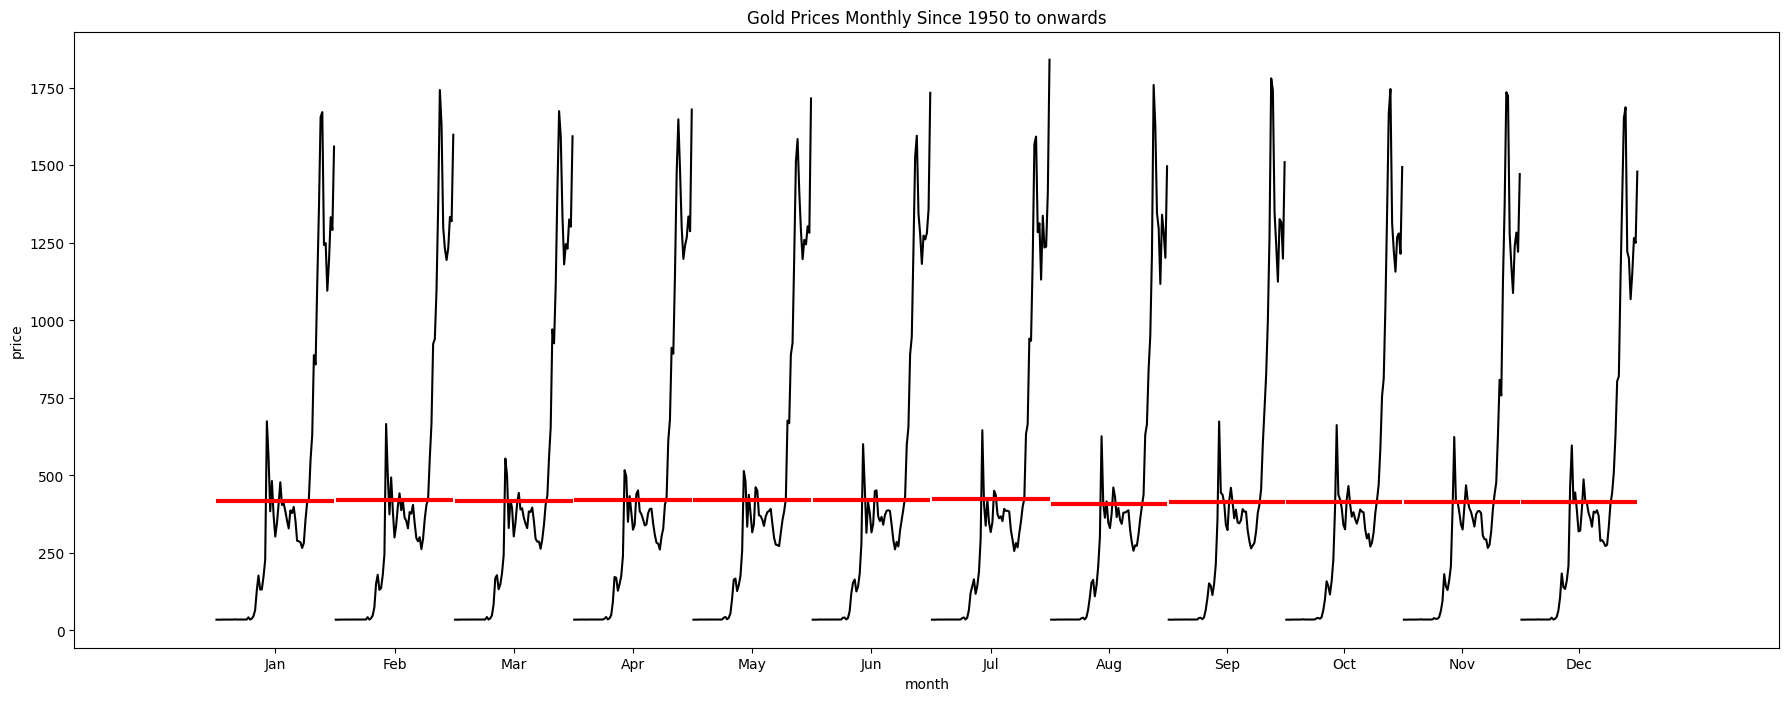

In [14]:
fig,ax = plt.subplots(figsize = (22,8))
month_plot(df, ylabel = "gold price", ax = ax)
plt.title('Gold Prices Monthly Since 1950 to onwards')
plt.grid()
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

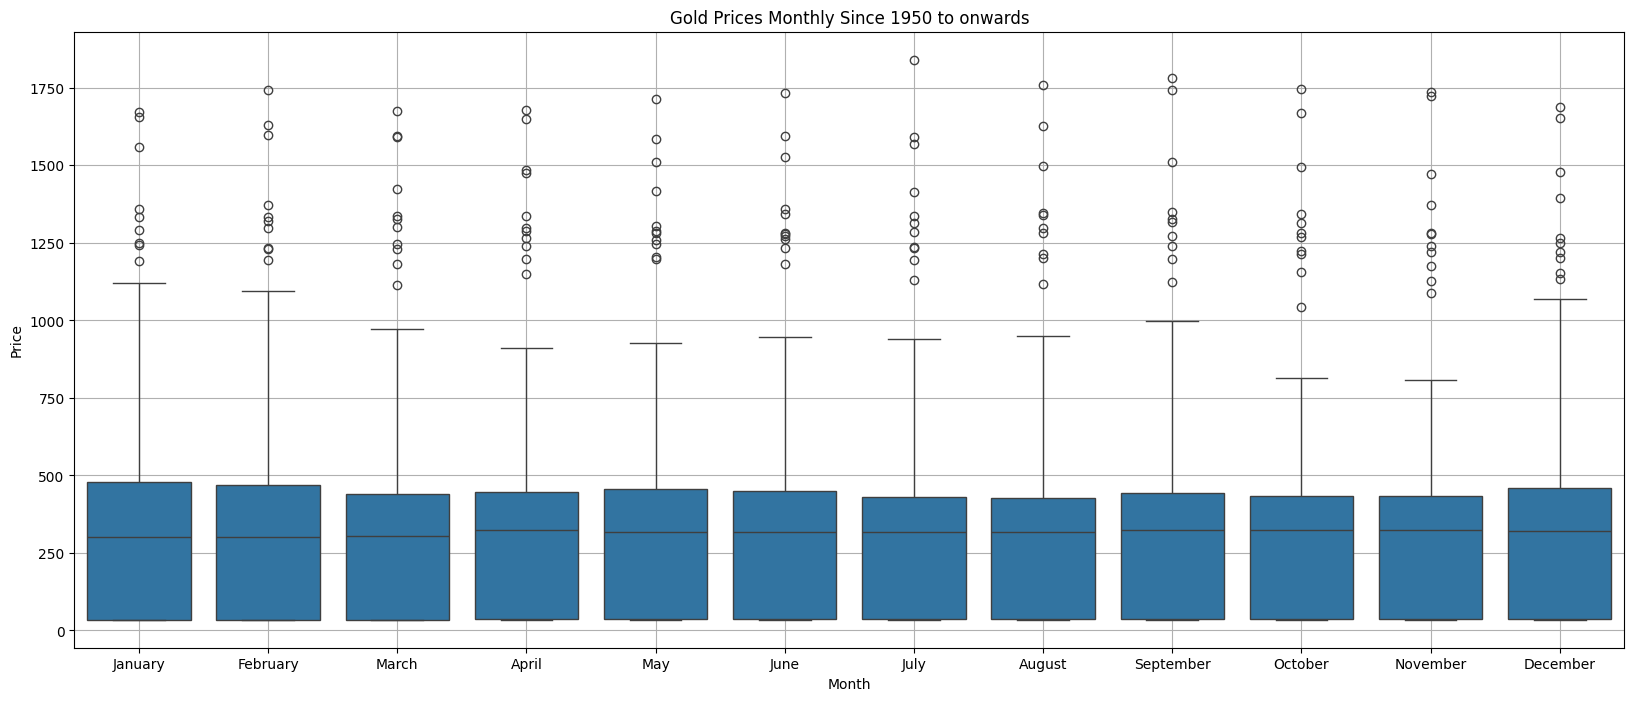

In [15]:
_,ax = plt.subplots(figsize = (20,8))
sns.boxplot(x = df.index.month_name(), y = df.values[:,0], ax = ax)
plt.title('Gold Prices Monthly Since 1950 to onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()

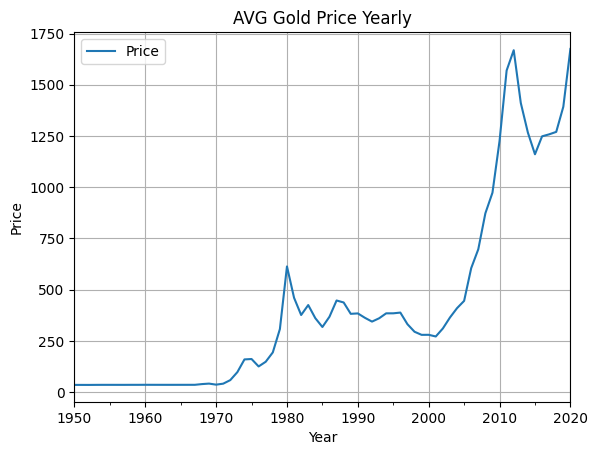

In [16]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('AVG Gold Price Yearly')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

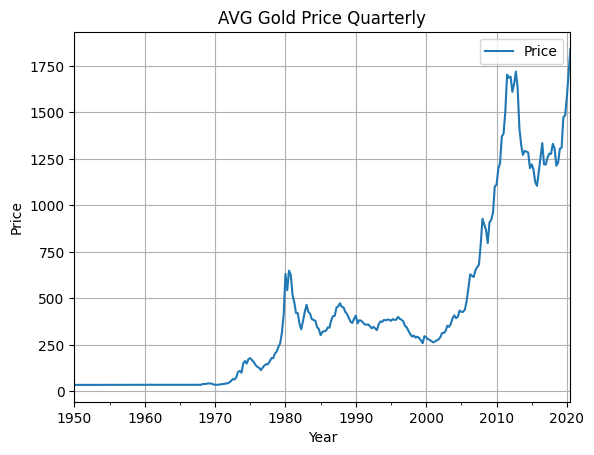

In [17]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('AVG Gold Price Quarterly')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

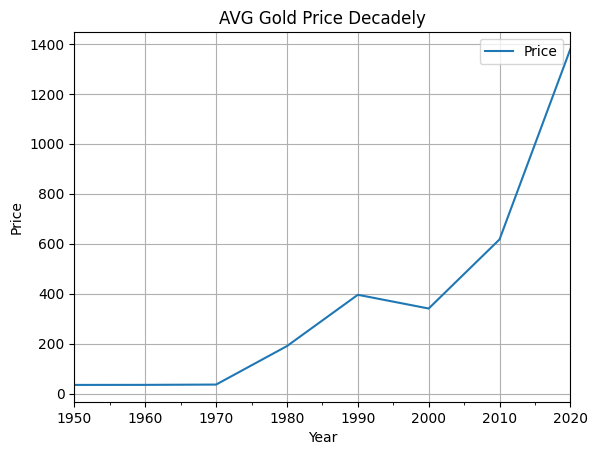

In [18]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('AVG Gold Price Decadely')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

COV = COV_pct stands for Coefficient of Variation Percentage.

COV (%) quantifies how much variation (dispersion) exists relative to the mean of the dataset.
It's expressed as a percentage, making it a normalized measure that can be used to compare variability across datasets with different units or scales.


In [19]:
df_1 = df.groupby(df.index.year).mean().rename(columns = {'Price': 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {'Price': 'Std'}), left_index = True, right_index = True)
df_1["Cov_pct"] = round(df_1["Std"]/df_1["Mean"]*100, 2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


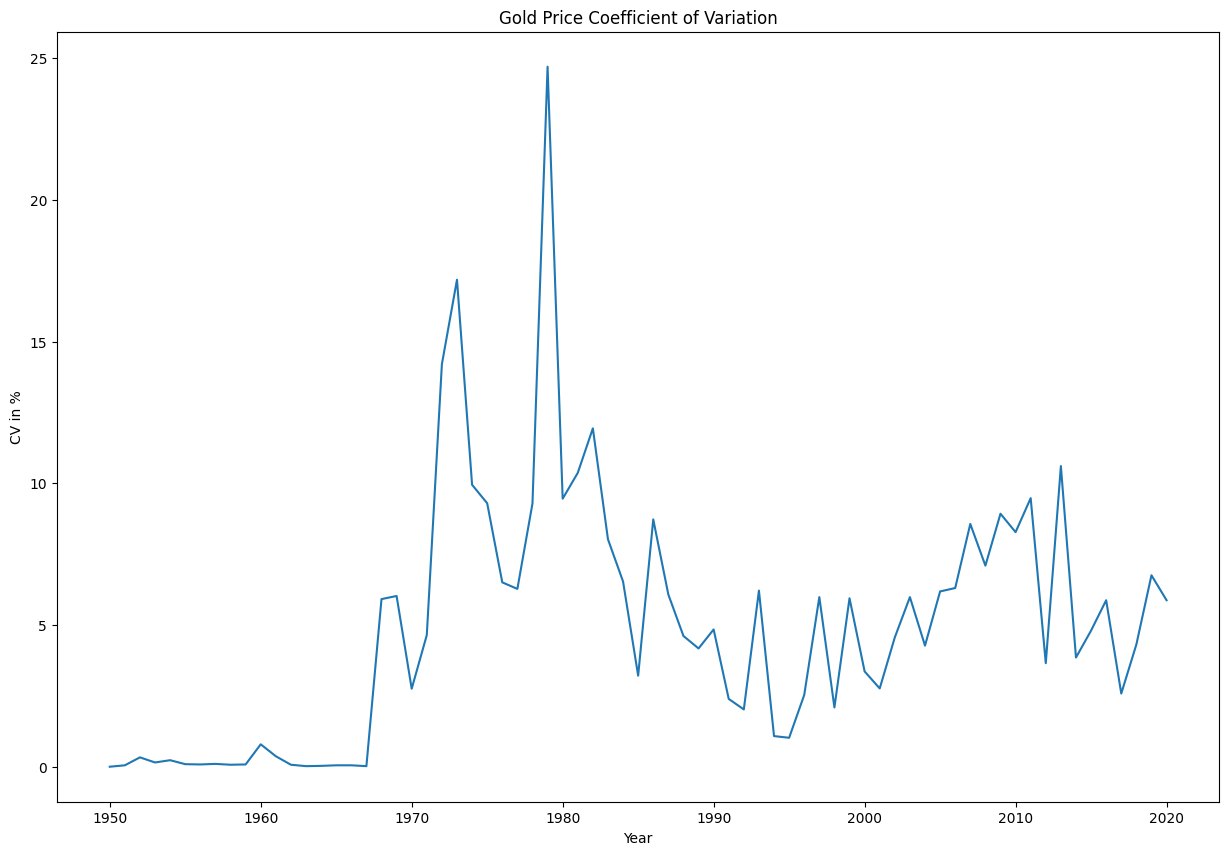

In [20]:
fig,ax = plt.subplots(figsize = (15,10))
df_1['Cov_pct'].plot()
plt.title('Gold Price Coefficient of Variation')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.show()

In [21]:
 train = df[df.index.year <= 2015]
 test = df[df.index.year > 2015]
 print(train.shape, test.shape)

(792, 1) (55, 1)


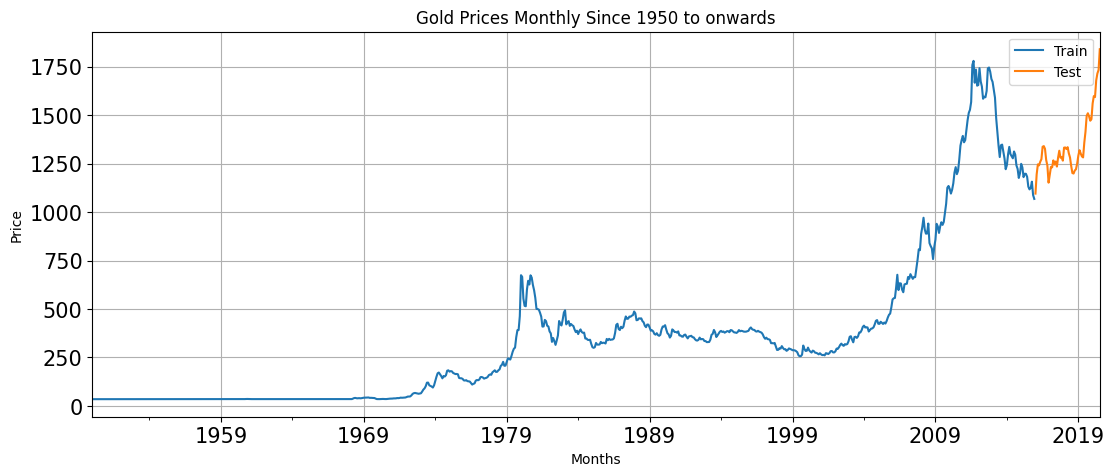

In [22]:
train["Price"].plot(figsize = (13,5), fontsize = 15)
test["Price"].plot(figsize = (13,5), fontsize = 15)
plt.title('Gold Prices Monthly Since 1950 to onwards')
plt.xlabel('Months')
plt.ylabel('Price')
plt.legend(['Train', 'Test'])
plt.grid()
plt.show()

In [27]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+1+len(train) for i in range(len(test))]
print(len(train_time) )
print(len(test_time))

792
55


In [28]:
LR_train = train.copy()
LR_test = test.copy()

In [41]:
LR_train["time"] = train_time
LR_test["time"] = test_time

In [42]:
lr = LinearRegression()
lr.fit(LR_train['time'].values.reshape(-1, 1), LR_train['Price'].values)

LinearRegression()

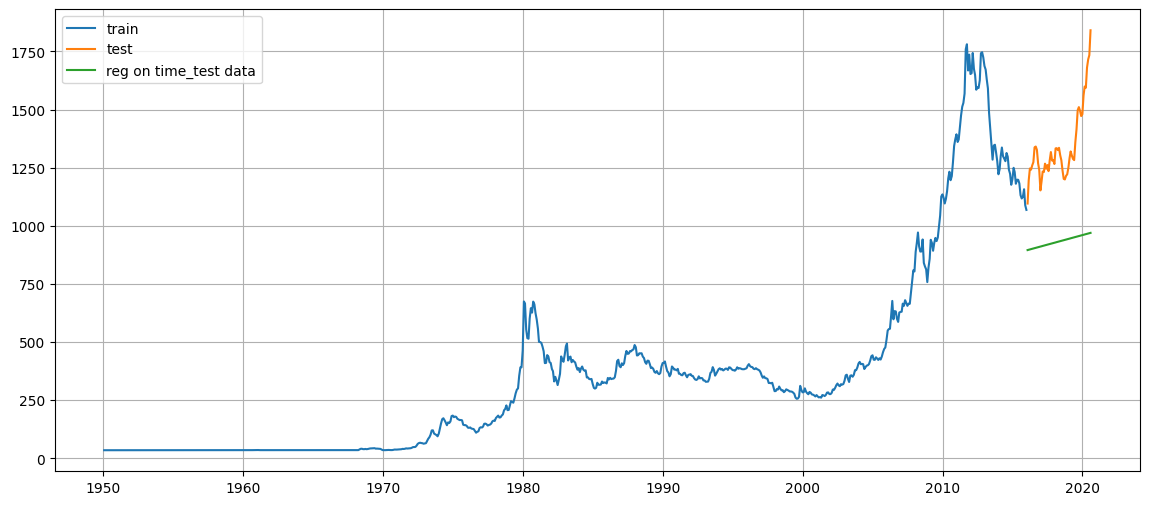

In [45]:
test_predictions_model1 = lr.predict(LR_test["time"].values.reshape(-1, 1))
LR_test["forecast"] = test_predictions_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(LR_test["forecast"], label = 'reg on time_test data')
plt.legend(loc = "best")
plt.grid()

In [51]:
def  mape(actual, prediction):
   return round((np.mean(abs(actual-prediction)/actual))*100,2)

In [54]:
mape_model1_test =  mape(test['Price'].values, test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test),'%')

MAPE is 29.760 %


In [56]:
results = pd.DataFrame({'Test Mape(%)': [mape_model1_test]}, index = ['RegressionOnTime'])
results

,Test Mape(%)
RegressionOnTime,29.76


In [57]:
Naive_train = train.copy()
Naive_test = test.copy()

In [58]:
Naive_test["naive"] = np.asarray(train["Price"])[len(np.asarray(train['Price']))-1]
Naive_test["naive"].head()

,naive
month,
2016-01-31,1068.317
2016-02-29,1068.317
2016-03-31,1068.317
2016-04-30,1068.317
2016-05-31,1068.317


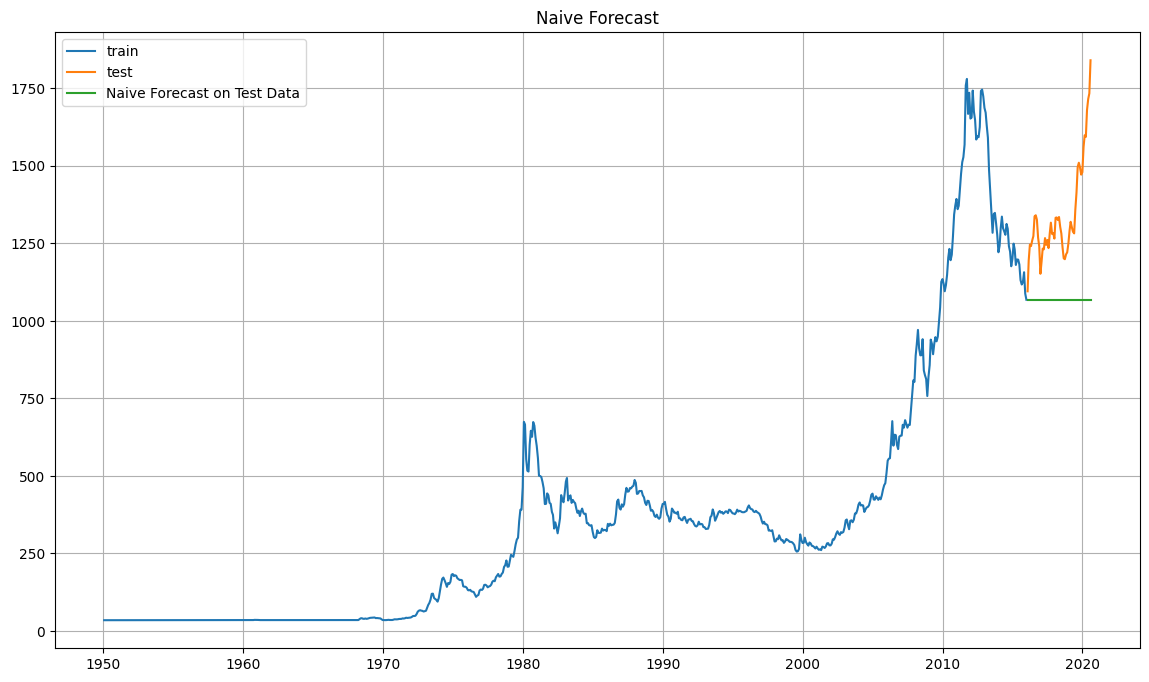

In [60]:
plt.figure(figsize = (14,8))
plt.plot(Naive_train['Price'],label = 'train')
plt.plot(Naive_test['Price'],label = 'test')
plt.plot(Naive_test['naive'],label = 'Naive Forecast on Test Data')
plt.legend(loc = "best")
plt.title('Naive Forecast')
plt.grid()

In [63]:
mape_model2_test = mape(test["Price"].values, Naive_test["naive"].values)
print("For Naive forecast on the Test Data, MAPE is %3.3f%%" % mape_model2_test)



For Naive forecast on the Test Data, MAPE is 19.380%


In [67]:
resultsDf_2 = pd.DataFrame({'Test MAPE (%)' : [mape_model2_test]},index = ["NaiveModel"])
results = pd.concat([results,resultsDf_2])
results

,Test Mape(%),Test MAPE (%)
RegressionOnTime,29.76,NaN
NaiveModel,NaN,19.38


In [68]:
final_model = ExponentialSmoothing(df, trend = 'add', seasonal = 'add').fit(smoothing_level= 0.4,
                                                                             smoothing_trend=0.3,
                                                                             smoothing_seasonal = 0.6)

In [69]:
Mape_final_model = mape(df["Price"].values, final_model.fittedvalues)
print("MAPE",Mape_final_model)

MAPE 17.24


In [72]:
prediction = final_model.forecast(steps = len(test))


In [75]:
pred_df = pd.DataFrame({'lower_CI': prediction - 1.96*np.std(final_model.resid, ddof = 1),
                        'prediction': prediction,
                        'upper_CI': prediction + 1.96*np.std(final_model.resid, ddof = 1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


TypeError: Legend.__init__() got an unexpected keyword argument 'log'

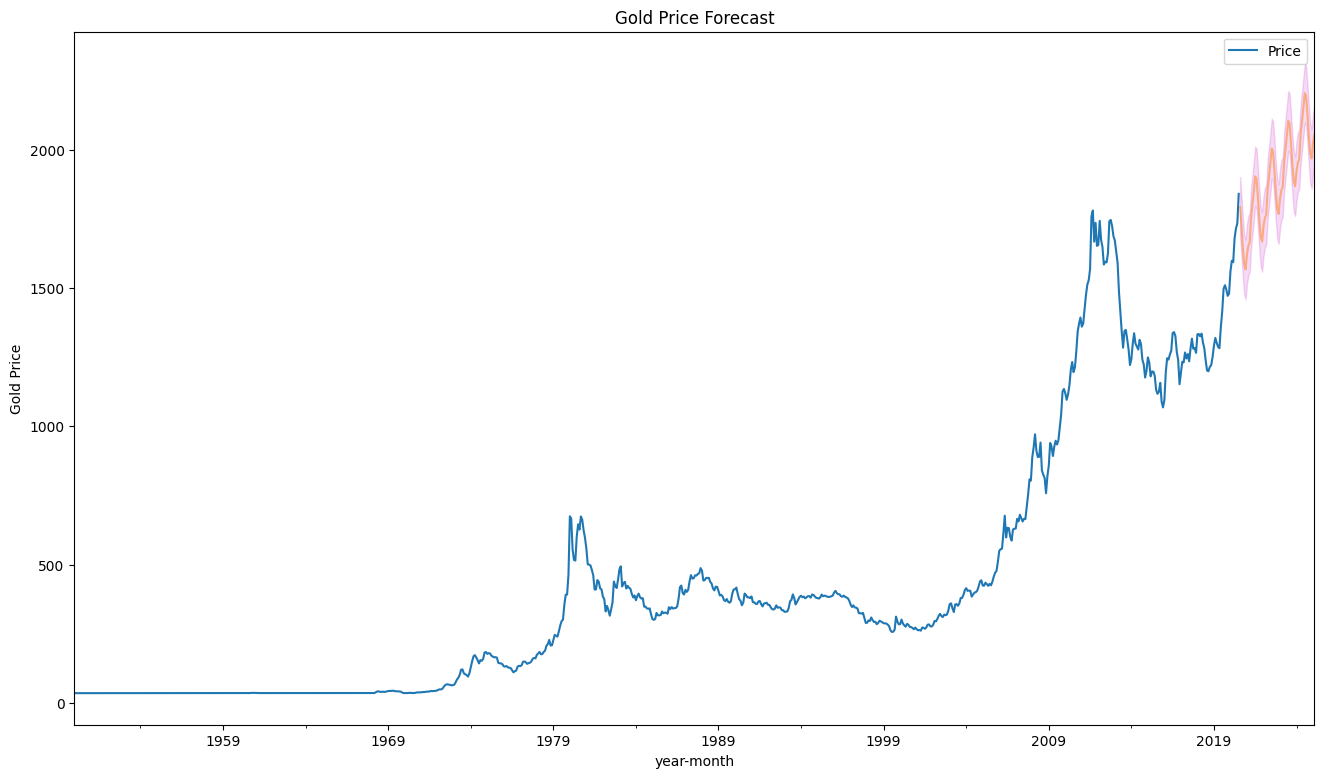

In [77]:
axis = df.plot(label = 'Actual', figsize = (16,9))
pred_df["prediction"].plot(ax = axis, label = 'FOrecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df["lower_CI"],pred_df["upper_CI"],color = 'm', alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('Gold Price')
plt.title('Gold Price Forecast')
plt.legend(log = "best")
plt.show()